In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("penguins_size.csv")

In [3]:
df.shape

(344, 7)

In [56]:
df[df.duplicated()==True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
# there are no duplicates

In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<AxesSubplot:>

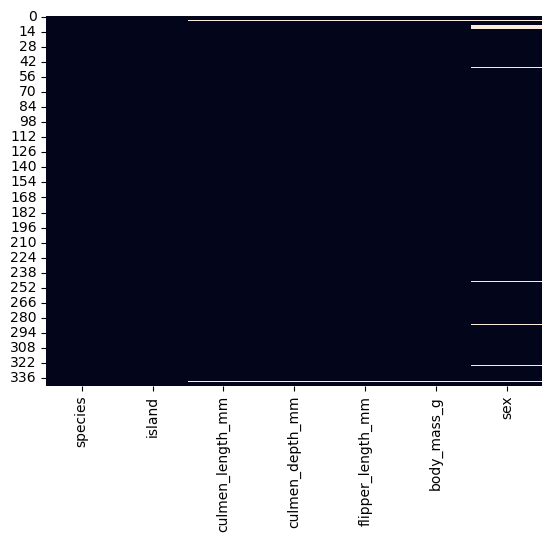

In [5]:
sns.heatmap(df.isnull(), cbar=False)

In [6]:
# from the visualization above, we notice some missing value in the column sex

In [7]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [8]:
df["sex"]=df[df["sex"]!="."]["sex"]
# i converted "." value to Nan

In [9]:
df[df["sex"].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [10]:
df=df.drop(df.index[[3,339]], axis = 0)

In [11]:
# i dropped rows index number 3 and 339 because almost all of their value were empty
# notice that after dropping those rows, all the empy values from the dataset disappeared, except for the missing ones in sex
# i will come back later to sort the missing sex columns to see if i find any clues regarding the possible sex 


In [12]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [13]:
# i ll do further unique method for each rows to discover any missing values different from Nan

In [14]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
df["culmen_length_mm"].unique()

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8, 41.1,
       38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.7, 35.9, 38.2, 38.8,
       35.3, 40.6, 40.5, 37.9, 37.2, 40.9, 36.4, 42.2, 37.6, 39.8, 36.5,
       40.8, 36. , 44.1, 37. , 39.6, 37.5, 42.3, 40.1, 35. , 34.5, 41.4,
       39. , 35.7, 41.3, 41.6, 35.5, 41.8, 33.5, 39.7, 45.8, 42.8, 36.2,
       42.1, 42.9, 35.1, 37.3, 36.3, 36.9, 38.3, 34. , 38.1, 33.1, 43.2,
       41. , 45.6, 42.7, 40.2, 35.2, 41.5, 38.5, 43.1, 36.8, 35.6, 32.1,
       40.7, 46.5, 50. , 51.3, 45.4, 52.7, 45.2, 46.1, 46.6, 51.7, 47. ,
       52. , 45.9, 50.5, 50.3, 58. , 46.4, 49.2, 42.4, 48.5, 50.6, 46.7,
       49.5, 52.8, 54.2, 51. , 49.7, 47.5, 47.6, 46.9, 53.5, 49. , 46.2,
       50.9, 45.5, 50.8, 50.1, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7, 52.2,
       49.3, 50.2, 51.9, 46.8, 55.8, 43.5, 49.6, 48.7, 43.3, 48.4, 45.1,
       46.3, 44.5, 47.8, 48.2, 47.3, 59.6, 49.1, 42.6, 44.4, 44. , 45.3,
       43.6, 44.9, 45. , 43.8, 50.4, 54.3, 47.7, 48

In [17]:
df["culmen_depth_mm"].unique()

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1, 17.3,
       17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2, 18.9,
       18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8, 17.7,
       19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. , 16.5,
       20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3, 14.1,
       15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1, 14.3,
       15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8, 14.9,
       15.6, 14. , 14.7])

In [18]:
df["flipper_length_mm"].unique()

array([181., 186., 195., 193., 190., 180., 182., 191., 198., 185., 197.,
       184., 194., 174., 189., 187., 183., 172., 178., 188., 196., 179.,
       200., 192., 202., 205., 208., 203., 199., 176., 210., 201., 212.,
       206., 207., 211., 230., 218., 215., 219., 209., 214., 216., 213.,
       217., 221., 222., 220., 225., 224., 231., 229., 223., 228., 226.])

In [19]:
df["flipper_length_mm"].unique()

array([181., 186., 195., 193., 190., 180., 182., 191., 198., 185., 197.,
       184., 194., 174., 189., 187., 183., 172., 178., 188., 196., 179.,
       200., 192., 202., 205., 208., 203., 199., 176., 210., 201., 212.,
       206., 207., 211., 230., 218., 215., 219., 209., 214., 216., 213.,
       217., 221., 222., 220., 225., 224., 231., 229., 223., 228., 226.])

In [20]:
df["body_mass_g"].unique()

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3475., 4250.,
       3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400., 3600.,
       3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000., 4600.,
       3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350., 4100.,
       3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075., 2925.,
       3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275., 4475.,
       3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675., 5700.,
       5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000., 5050.,
       5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300., 4850.,
       5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925., 4975.,
       5500., 4575., 4375., 5750.])

In [21]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [22]:
# the dataset is clean, let`s go back to the missing value in sex

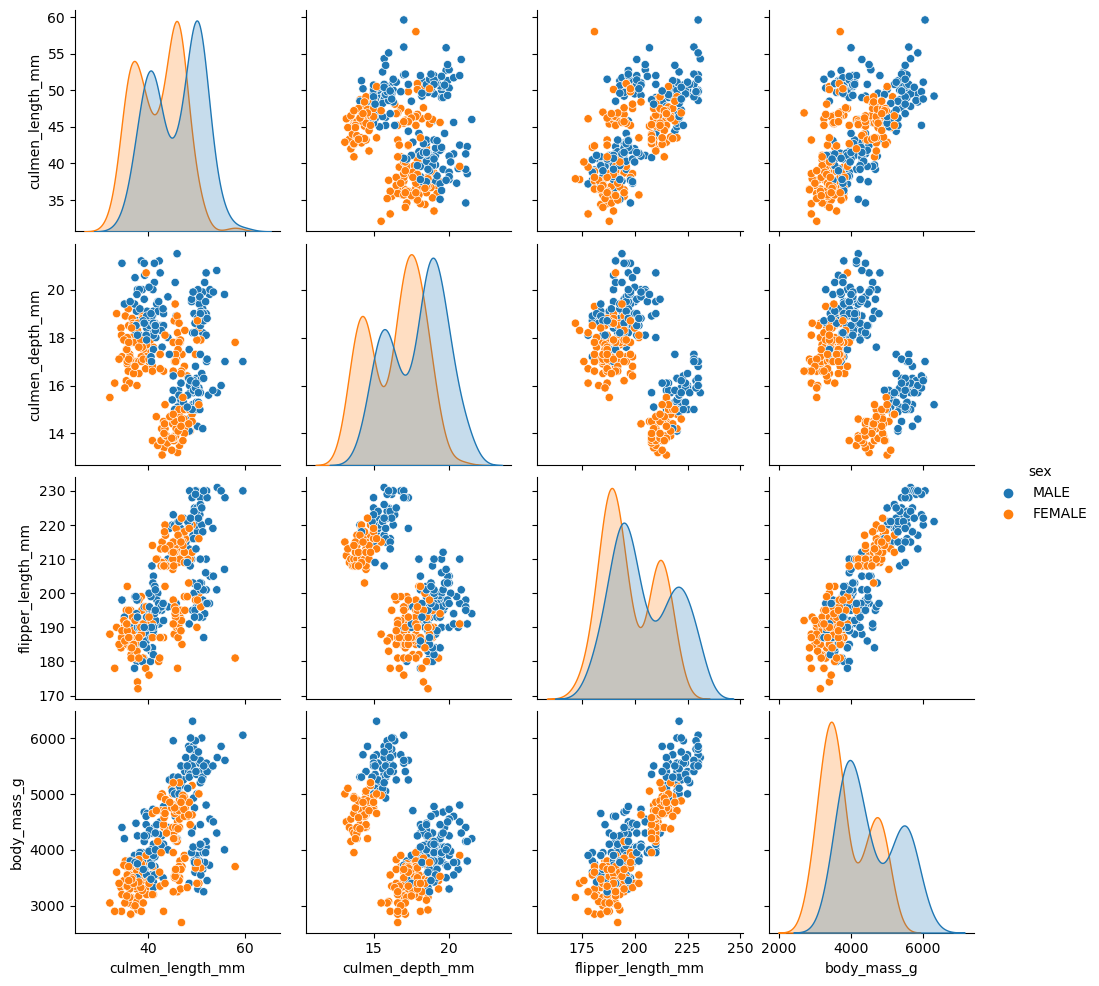

In [23]:
sns.pairplot(df, hue = "sex")

In [24]:
# from the above plot , Male sex have highter body mass, flipper lenght, culmen depth and also culmen lenght
# for the Female sex is the opposite
# this will help to replace the missing value in sex

In [25]:
columns=["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

In [26]:
df[columns].sort_values(by="culmen_length_mm", ascending = True).head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,32.1,15.5,188.0,3050.0,FEMALE
98,33.1,16.1,178.0,2900.0,FEMALE
70,33.5,19.0,190.0,3600.0,FEMALE
92,34.0,17.1,185.0,3400.0,FEMALE
8,34.1,18.1,193.0,3475.0,NaN
18,34.4,18.4,184.0,3325.0,FEMALE
54,34.5,18.1,187.0,2900.0,FEMALE
80,34.6,17.2,189.0,3200.0,FEMALE
14,34.6,21.1,198.0,4400.0,MALE
100,35.0,17.9,192.0,3725.0,FEMALE


In [27]:
df.loc[8]=df.loc[8].fillna("FEMALE")

In [28]:
df[columns].sort_values(by="flipper_length_mm", ascending = True).head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
28,37.9,18.6,172.0,3150.0,FEMALE
20,37.8,18.3,174.0,3400.0,FEMALE
122,40.2,17.0,176.0,3450.0,FEMALE
31,37.2,18.1,178.0,3900.0,MALE
30,39.5,16.7,178.0,3250.0,FEMALE
158,46.1,18.2,178.0,3250.0,FEMALE
98,33.1,16.1,178.0,2900.0,FEMALE
47,37.5,18.9,179.0,2975.0,NaN
29,40.5,18.9,180.0,3950.0,MALE
24,38.8,17.2,180.0,3800.0,MALE


In [29]:
df.loc[47]=df.loc[47].fillna("FEMALE")
df.loc[11]=df.loc[11].fillna("FEMALE")

In [30]:
df[columns].sort_values(by="body_mass_g", ascending = True).head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
190,46.9,16.6,192.0,2700.0,FEMALE
64,36.4,17.1,184.0,2850.0,FEMALE
58,36.5,16.6,181.0,2850.0,FEMALE
116,38.6,17.0,188.0,2900.0,FEMALE
98,33.1,16.1,178.0,2900.0,FEMALE
54,34.5,18.1,187.0,2900.0,FEMALE
174,43.2,16.6,187.0,2900.0,FEMALE
104,37.9,18.6,193.0,2925.0,FEMALE
47,37.5,18.9,179.0,2975.0,FEMALE
44,37.0,16.9,185.0,3000.0,FEMALE


In [31]:
df[df["sex"].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [32]:
df[["sex"]].value_counts()

sex   
FEMALE    168
MALE      168
dtype: int64

<AxesSubplot:ylabel='sex'>

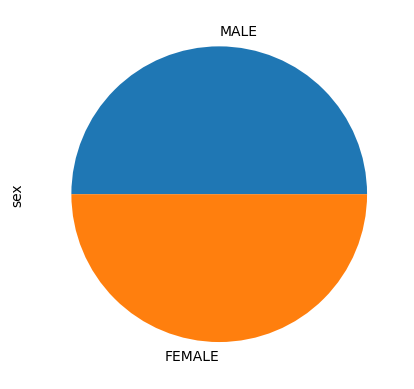

In [33]:
df["sex"].value_counts().plot(kind = "pie")

In [34]:
# it seems like that the distribution between male and female are the same.
# I will try to compensate the missing value correspondind to the genre in minority

In [35]:
df[["sex","species"]].value_counts()

sex     species  
FEMALE  Adelie       76
MALE    Adelie       73
        Gentoo       61
FEMALE  Gentoo       58
        Chinstrap    34
MALE    Chinstrap    34
dtype: int64

In [36]:
df[df["species"] =="Adelie"]=df[df["species"] =="Adelie"].fillna("MALE")

In [37]:
df[["sex"]].value_counts()

sex   
MALE      170
FEMALE    168
dtype: int64

In [38]:
# fill up the remaining empty value with FEMALE because they are less than male

In [39]:
df.fillna("FEMALE",inplace=True)

In [40]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [41]:
# now the dataset is clean from missing value

In [42]:
df["sex"].value_counts()

FEMALE    172
MALE      170
Name: sex, dtype: int64

In [43]:
# let s find some relashionship in the dataset and show the results

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

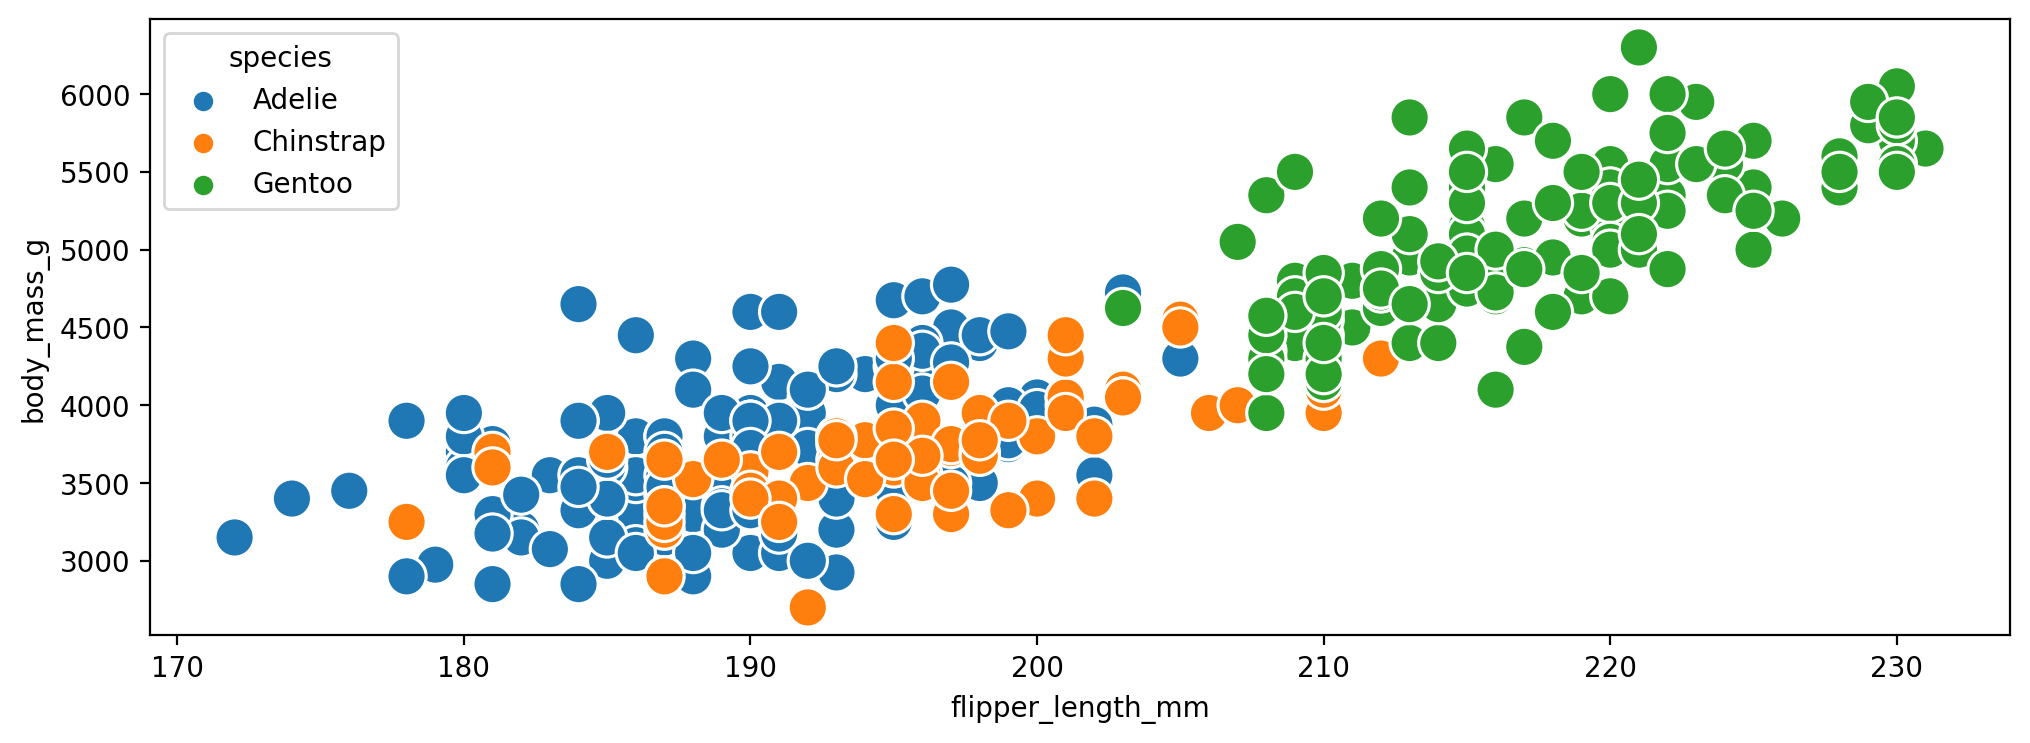

In [44]:
plt.figure(figsize=(12,4) , dpi=200)
sns.scatterplot(data = df, x = df["flipper_length_mm"], y = df["body_mass_g"] , s=200 , hue="species")

In [45]:
# from the scatterplot graph above, we can visualize that the relashionship between flipper lenght and body mass is directly proportional.
# Bigger is the size of the penguin, longer is the flipper
# We also visualize that penguins which belong to the Gentoo species, are much bigger

<AxesSubplot:xlabel='island', ylabel='culmen_depth_mm'>

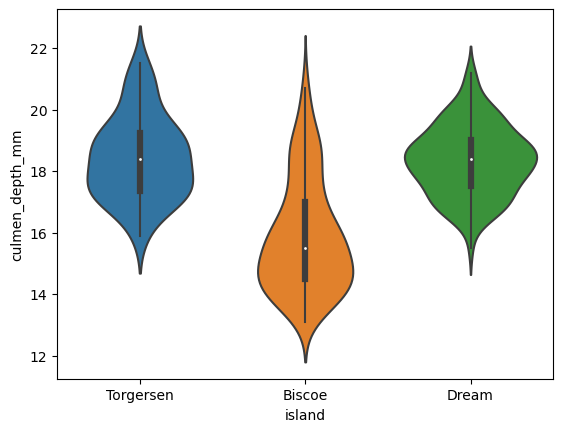

In [46]:
sns.violinplot(x = "island", y= "culmen_depth_mm", data = df)

In [47]:
# from the violin plot above, we can visualize that in Biscoe island, there is a wider variation between the culmen depth of the penguins

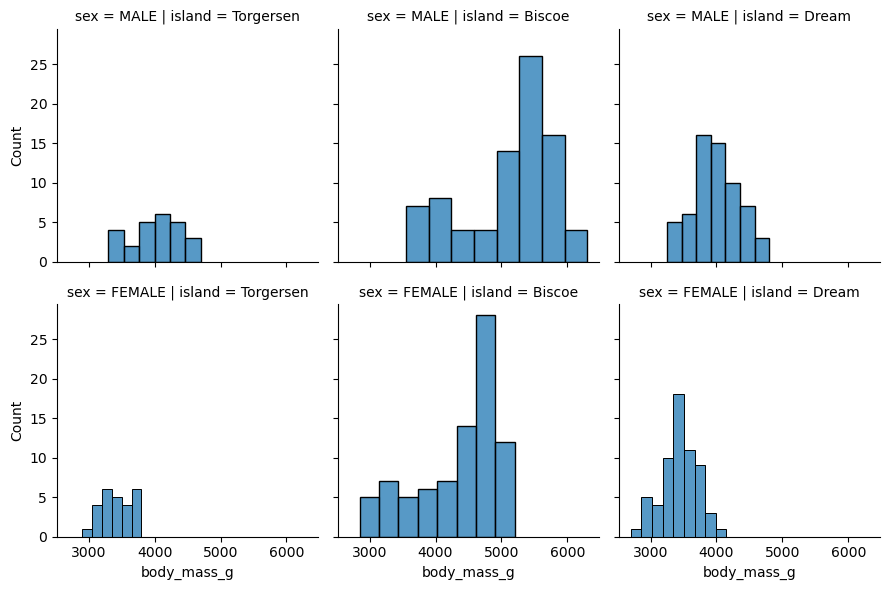

In [48]:
sns.FacetGrid(df, col="island" , row = "sex").map(sns.histplot, "body_mass_g")

In [49]:
# from the facegrid graph above, we can visualize different things.
# the island of Biscoe, contains bigger sizes penguins
# The majority of male genrethat belongs to this island, have a body mass around 5200 g.
# The majority of female genre that belongs to this island, have a body mass around 4800 g.


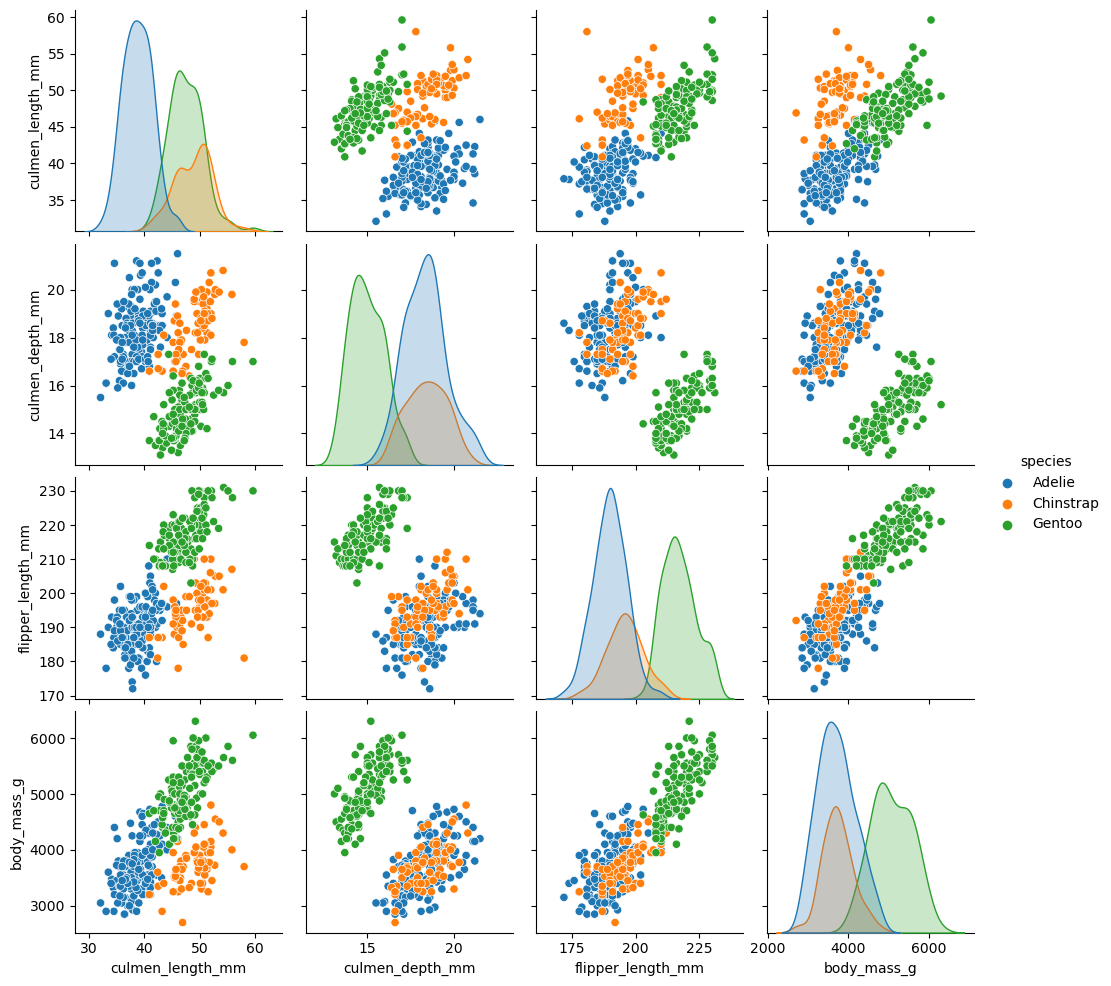

In [50]:
sns.pairplot(df, hue="species")

In [51]:
# from the above pairplot graph, we notice someting interesting.
# we can notice the sizes of the penguing belonging to the species Chinstrap and Adelie are very similar.
# They have same culmen depth, flipper lenght and they differ only in the lenght of the culmen..
# differently, Gentoo species have totally different sizes parameters

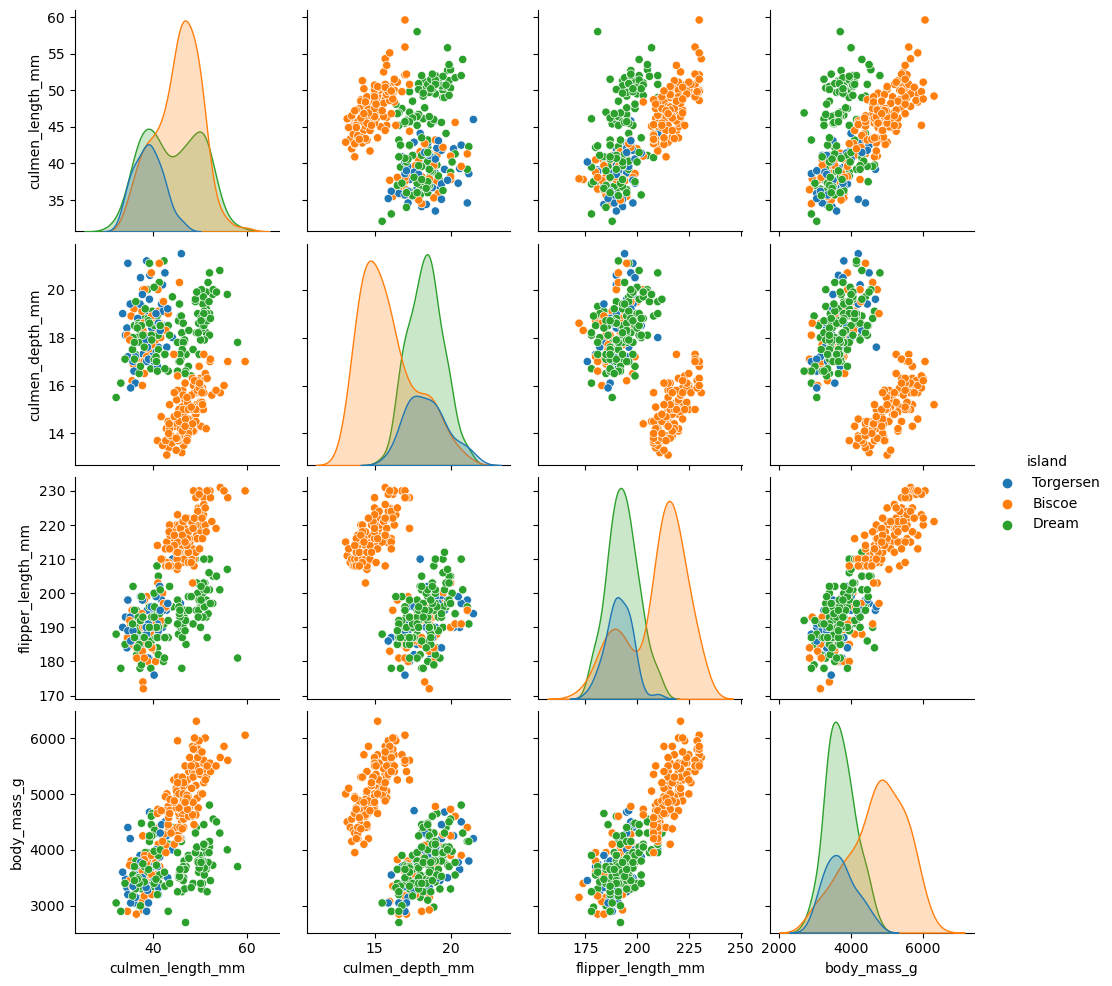

In [52]:
sns.pairplot(df, hue="island")

In [53]:
# like the example above, we can visualize the relashionship between different island.
# it seems that in the islands of Biscoe and dream, the penguins have similar numeric variables.
# instead, in the Torgersen island, we visualize that penguins have different sizes.

<AxesSubplot:>

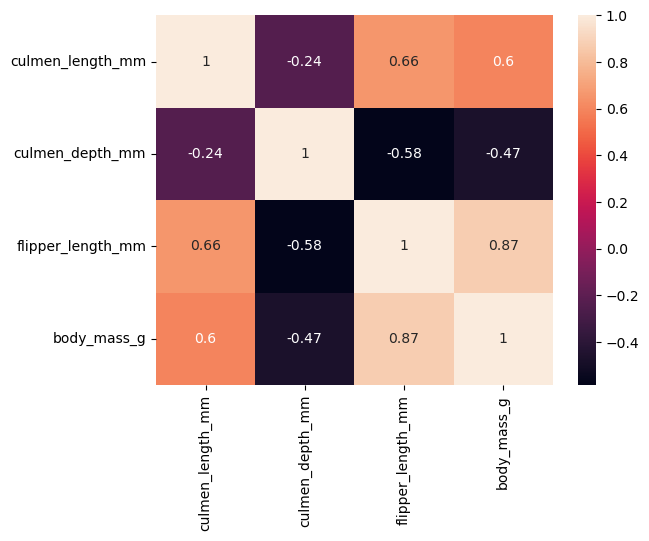

In [54]:
sns.heatmap(df.corr() , annot=True)

In [55]:
# finally, from the heatmap graph above, we can also visualize the correlation between the numerical variables